In [2]:
import yfinance as yf
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

2023-04-13 09:48:09.899791: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Download the data using pandas_datareader
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
table = data[0]
tickers = table['Symbol'].tolist()
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CV

In [4]:
prices = pd.DataFrame()

In [5]:
tickers_list = tickers[:10] # change this to include all the tickers you want

# Retrieve the closing prices for each ticker
for ticker in tickers_list:
    ticker_data = yf.download(ticker, start="2020-01-01", end="2021-12-31", interval="1d")
    if len(ticker_data) > 0:
        prices[ticker] = ticker_data['Close'] # add the prices to the prices DataFrame
    else:
        print(f"Skipping {ticker}: no data available for the specified date range")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
prices

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP
Date,,,,,,,,,,
2020-01-02,180.000000,47.770000,86.949997,89.550003,210.149994,58.650002,46.110001,334.429993,170.320007,159.410004
2020-01-03,178.449997,47.349998,85.889999,88.699997,209.800003,58.669998,46.020000,331.809998,169.960007,159.419998
2020-01-06,178.619995,47.650002,86.339996,89.400002,208.429993,59.740002,45.660000,333.709991,170.190002,156.800003
2020-01-07,177.899994,47.330002,85.860001,88.889999,203.929993,60.340000,45.110001,333.390015,168.130005,154.940002
2020-01-08,180.630005,47.259998,86.209999,89.519997,204.330002,59.880001,44.610001,337.869995,169.710007,153.160004
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,174.970001,82.769997,139.160004,133.089996,403.309998,65.160004,65.440002,569.619995,242.000000,232.130005
2021-12-27,176.699997,84.699997,141.460007,134.410004,415.329987,65.449997,66.070000,577.679993,246.289993,236.500000
2021-12-28,177.639999,85.540001,140.470001,134.389999,415.269989,66.669998,66.930000,569.359985,246.070007,238.130005


In [7]:
# Save the DataFrame to a CSV file
prices.to_csv('/Users/antoinesfeir/Documents/GitHub/mlResearch/S&P500_ClosingPrices')

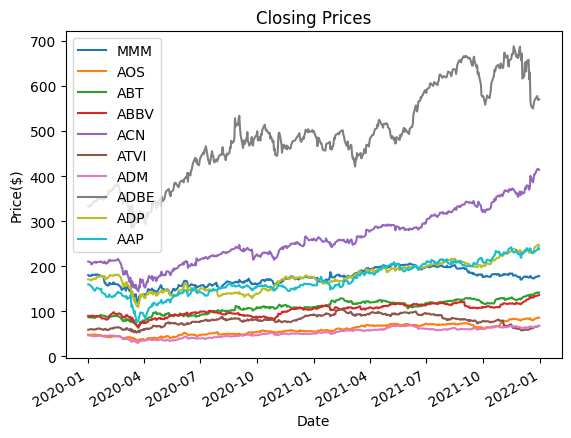

In [8]:
prices.plot()
plt.title("Closing Prices")
plt.ylabel('Price($)')
plt.xlabel('Date')

# Display the plot
plt.show()

Text(0.5, 0, 'Date(days)')

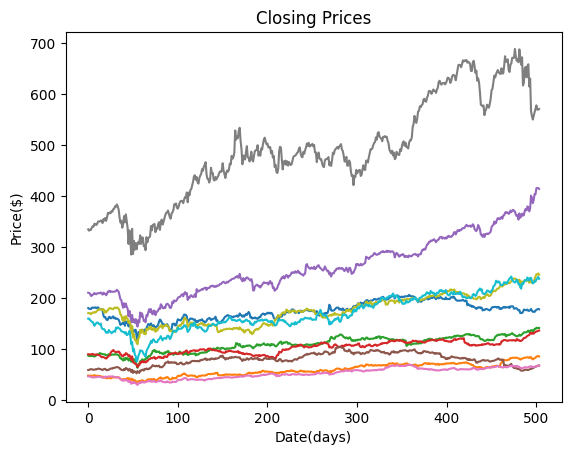

In [9]:
ds = prices.values
plt.plot(ds)
plt.title('Closing Prices')
plt.ylabel('Price($)')
plt.xlabel('Date(days)')

In [10]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))
ds_scaled

array([[0.22864383],
       [0.02800959],
       [0.08745789],
       ...,
       [0.82119994],
       [0.32811884],
       [0.31591965]])

In [11]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70) # train set is 70%
test_size = len(ds_scaled) - train_size # test is the other 30%

In [12]:
#Splitting data between train and test
ds_train  = ds_scaled[0:train_size,:]
ds_test = ds_scaled[train_size:len(ds_scaled),:]

In [36]:
# shift test for plotting
ds_test = np.concatenate((ds_train, ds_test), axis=0)
ds_test.shape

(5040, 1)

In [37]:
# Reshape the data for LSTM input
def create_ds(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset)-time_steps):
        X.append(dataset[i:i+time_steps, :])
        y.append(dataset[i+time_steps, 0])
    return np.array(X), np.array(y)

In [38]:
time_steps = 60
X_train, y_train = create_ds(ds_train, time_steps)
X_test, y_test = create_ds(ds_test, time_steps)

In [39]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], X_test.shape[2])

In [40]:
print(ds_train.shape)
print(ds_test.shape)

(3528, 1)
(5040, 1)


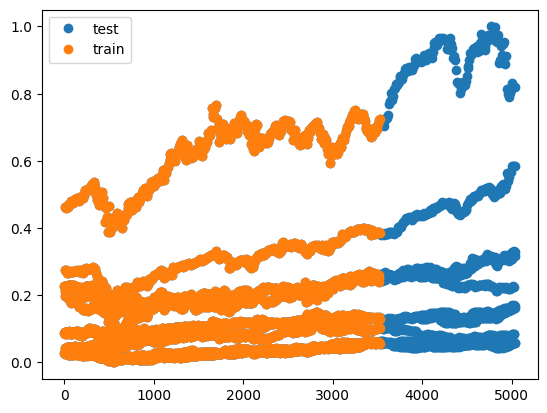

In [43]:
plt.plot(ds_test, 'o', label='test')
plt.plot(ds_train,'o', label='train')
plt.legend()
plt.show()

In [44]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
55/55 [==============================] - 4s 42ms/step - loss: 0.0302
Epoch 2/100
55/55 [==============================] - 2s 42ms/step - loss: 0.0275
Epoch 3/100
55/55 [==============================] - 2s 42ms/step - loss: 0.0226
Epoch 4/100
55/55 [==============================] - 2s 42ms/step - loss: 0.0170
Epoch 5/100
55/55 [==============================] - 2s 42ms/step - loss: 0.0147
Epoch 6/100
55/55 [==============================] - 2s 42ms/step - loss: 0.0146
Epoch 7/100
55/55 [==============================] - 2s 42ms/step - loss: 0.0129
Epoch 8/100
55/55 [==============================] - 2s 42ms/step - loss: 0.0127
Epoch 9/100
55/55 [==============================] - 2s 42ms/step - loss: 0.0127
Epoch 10/100
55/55 [==============================] - 2s 42ms/step - loss: 0.0119
Epoch 11/100
55/55 [==============================] - 2s 42ms/step - loss: 0.0109
Epoch 12/100
55/55 [==============================] - 2s 42ms/step - loss: 0.0100
Epoch 13/100
55/55 [=====

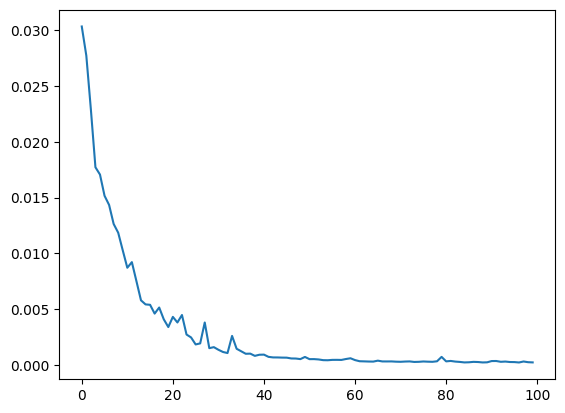

In [19]:
loss = model.history.history['loss']
plt.plot(loss, label='How much we where off from the actual prices')

In [20]:
# Evaluate the model on the test data
model.evaluate(X_test, y_test)
# Make predictions on the test data
y_pred = model.predict(X_test)

46/46 [==============================] - 1s 10ms/step


In [21]:
print(X_test.shape)
print(y_pred.shape)
print(y_test.shape)


(1452, 60, 1)
(1452, 1)
(1452,)


In [22]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

46/46 [==============================] - 0s 9ms/step


In [46]:
# Shift test predictions for plotting
test_predict = np.concatenate((train_predict, test_predict), axis=0)
test_predict.shape

(4920, 1)

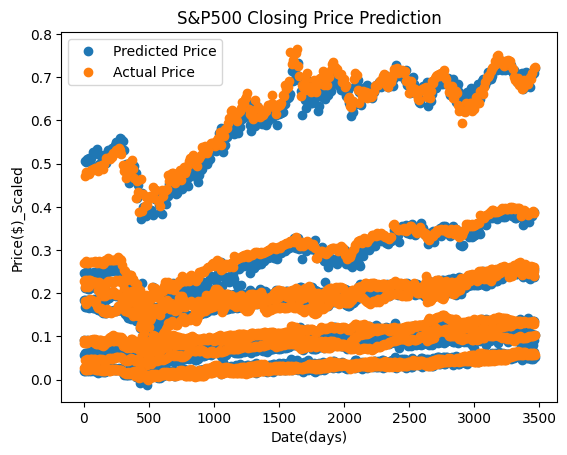

[[0.02014081]
 [0.05726158]
 [0.09166004]
 [0.24709442]
 [0.06224607]
 [0.02908362]
 [0.50681365]
 [0.21098077]
 [0.16834547]]


In [47]:
plt.plot(train_predict, 'o', label='Predicted Price')
plt.plot(y_train, 'o', label='Actual Price')
plt.title('S&P500 Closing Price Prediction')
plt.ylabel('Price($)_Scaled')
plt.xlabel('Date(days)')
plt.legend()
plt.show()
print(train_predict[1:10])

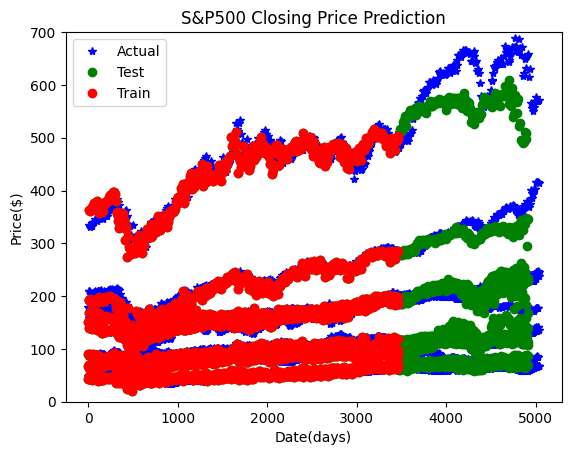

In [49]:
#Comparing using visuals

plt.plot(normalizer.inverse_transform(ds_scaled), 'b*', label="Actual")
plt.plot(normalizer.inverse_transform(test_predict),'go', label="Test")
plt.plot(normalizer.inverse_transform(train_predict), 'ro', label="Train")
plt.ylim(0, 700)
plt.title('S&P500 Closing Price Prediction')
plt.ylabel('Price($)')
plt.xlabel('Date(days)')
plt.legend()
plt.show()